#### Run on Colab

In [ ]:
!pip install tensorflow
!pip install transformers
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
# else:
    # raise SystemError('GPU device not found')


import io
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import os

import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
!pip install -q tf-models-official==2.4.0
from official.modeling import tf_utils
from official import nlp
from official.nlp import bert

# Load the required submodules
import official.nlp.optimization
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization
import official.nlp.data.classifier_data_lib
import official.nlp.modeling.losses
import official.nlp.modeling.models
import official.nlp.modeling.networks

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
#importing the file in colab
import seaborn as sns

tamp = {'contradiction':0,'entailment':1,'neutral':2}

def softmax(x):


## This function performs Softmax Operaton
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def convert_arr2onehot(result):
##function to convert list of index array to one hot encode form

  b = np.zeros((result.size, 3))
  b[np.arange(result.size),result] = 1
  return b

def inv_tamp(tamp,list_):
  ret = []
  for i in list_:
    ret.append([k for k, v in tamp.items() if np.argmax(i) == v])
  return ret

     |████████████████████████████████| 2.0MB 8.3MB/s 
     |████████████████████████████████| 890kB 46.6MB/s 
     |████████████████████████████████| 3.2MB 26.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=ce8bc69947a1ffec824c4ec25909ef16b4d511d847b770aea530002b27de33ed
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
Found GPU at: /device:GPU:0
     |████████████████████████████████| 1.1MB 7.6MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 358kB 17.8MB/s 
     |████████████████████████████████| 706kB 32.6MB/s 
     |████████████████████████████████| 174kB 48.6MB/s 
     |████████████████████████████████| 645kB 35.9MB/s 
     |████████████████████████████████| 37.6MB 97kB/s 
     |████████████████████████████████| 1.2MB 57.2MB/s 



**Load Dataset**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
## upload train file
uploaded = files.upload()  

Saving train.csv to train.csv


In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv'])) #mension the training file name to be inserted insted of train.csv

In [ ]:
train1 = train.copy()          #copy is made so that original tables remain original and copy is used

## **EDA**

In [ ]:
#Finding the top 5 most frequently used sentences
import numpy as np
qids = pd.Series(list(train1['sentence1']) + list(train1['sentence2']))

print ('Unique sentence number: {}\n'.format(len(np.unique(qids))))

q_vals=qids.value_counts()[0:5]
print ('Top 5 most frequently given sentence: ')


for pair in q_vals.iteritems():
    print(" sentence: " + pair[0]+ " count: " + str(pair[1]))

q_vals=q_vals.values

Unique sentence number: 12501

Top 5 most frequently given sentence: 
 sentence: A group of people plays a game on the floor of a living room while a TV plays in the background. count: 6
 sentence: Two boys, one wearing green, the other in yellow, are playing with sidewalk chalk, drawing pictures on the ground. count: 6
 sentence: Beautiful red car among many at a car show full of excited car enthusiasts held on a tree lined street. count: 6
 sentence: A man in a blue plaid shirt and blue jeans, wearing a black helmet, pauses to drink water next to a large blue steel corrugated tube. count: 6
 sentence: There are multiple people present. count: 6


In [ ]:
#finding number of duplicate (sentence1,sentence2) pair
duplicate_rows = train1[train1.duplicated(['sentence1','sentence2'])]
print ("Number of duplicate sentences : ", len(duplicate_rows))

Number of duplicate sentences :  1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


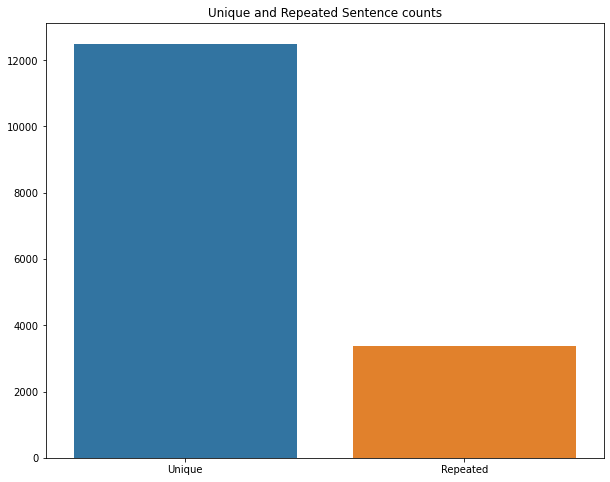

In [ ]:
#Plotting Unique and repeated sentence count
x = ["Unique" , "Repeated"]
y =  [len(np.unique(qids)), np.sum(qids.value_counts() > 1)]

plt.figure(figsize=(10, 8))
plt.title ("Unique and Repeated Sentence counts")
sns.barplot(x,y)
plt.show()

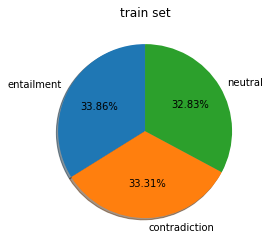

In [ ]:
#Plotting pie chart of class distribution of data
def pie_chart(entailment,contradiction,neutral, set_type):
    labels = 'entailment', 'contradiction','neutral'
    sizes = [entailment,contradiction,neutral]

    fig1, ax1 = plt.subplots()
    ax1.set_title(set_type)
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)

    plt.show()

# similar_samples_num = sum(train['gold_label'].values)
# print(similar_samples_num)
pie_chart(len(train1.loc[train1['gold_label'] == 'entailment']),len(train1.loc[train1['gold_label'] == 'contradiction']),len(train1.loc[train1['gold_label'] == 'neutral']), 'train set')

In [ ]:
train1 = train.copy()


In [ ]:
train1['gold_label'].value_counts(normalize = True)   ## Seeing the percentage distribution of the classes

entailment       0.338646
contradiction    0.333084
neutral          0.328270
Name: gold_label, dtype: float64

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

directory contains the configuration, vocabulary, and a pre-trained checkpoint used

In [ ]:
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/v3/uncased_L-12_H-768_A-12"
tf.io.gfile.listdir(gs_folder_bert)

['bert_config.json',
 'bert_model.ckpt.data-00000-of-00001',
 'bert_model.ckpt.index',
 'vocab.txt']

In [ ]:

hub_url_bert = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3"


## Perform Label Encodeng

In [ ]:
train1 = train.copy()
## converting into one hot using custom function convert_arr2onehot
one_hot = convert_arr2onehot(np.array([tamp[i] for i in train1['gold_label']]))

Splitting Data Set

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(train1[['sentence1','sentence2']], one_hot, 
                                                                    random_state=2018, 
                                                                    test_size=0.2, 
                                                                    stratify=one_hot)

In [ ]:
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.2, 
                                                                stratify=temp_labels)

In [ ]:
# Set up tokenizer to generate Tensorflow dataset
tokenizer = bert.tokenization.FullTokenizer(
    vocab_file=os.path.join(gs_folder_bert, "vocab.txt"),
     do_lower_case=True)

print("Vocab size:", len(tokenizer.vocab))


Vocab size: 30522


Trial Tokenization

In [ ]:
tokens = tokenizer.tokenize("Hello TensorFlow!")
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

['hello', 'tensor', '##flow', '!']
[7592, 23435, 12314, 999]


In [ ]:
tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

[101, 102]

### **Declaring Data Encoding Functions**

In [ ]:
def encode_sentence(s, tokenizer):
   tokens = list(tokenizer.tokenize(s))
   tokens.append('[SEP]')
   return tokenizer.convert_tokens_to_ids(tokens)

def bert_encode(dict_, tokenizer):
  num_examples = len(dict_["sentence1"])

  sentence1 = tf.ragged.constant([
      encode_sentence(s, tokenizer)
      for s in np.array(dict_["sentence1"])])
  sentence2 = tf.ragged.constant([
      encode_sentence(s, tokenizer)
       for s in np.array(dict_["sentence2"])])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*sentence1.shape[0]
  input_word_ids = tf.concat([cls, sentence1, sentence2], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor()

  type_cls = tf.zeros_like(cls)
  type_s1 = tf.zeros_like(sentence1)
  type_s2 = tf.ones_like(sentence2)
  input_type_ids = tf.concat(
      [type_cls, type_s1, type_s2], axis=-1).to_tensor()

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs

Encoding Data

In [ ]:
sentence_train = bert_encode(train_text, tokenizer)
sentence_train_labels = train_labels

sentence_validation = bert_encode(val_text, tokenizer)
sentence_validation_labels = val_labels

sentence_test = bert_encode(test_text, tokenizer)
sentence_test_labels  = test_labels

In [ ]:
for key, value in sentence_train.items():
  print(f'{key:15s} shape: {value.shape}')

print(f'sentence_train_labels shape: {sentence_train_labels.shape}')

input_word_ids  shape: (7479, 89)
input_mask      shape: (7479, 89)
input_type_ids  shape: (7479, 89)
sentence_train_labels shape: (7479, 3)


### **Building Model**

In [ ]:
import json
## downloading configuration for pre trained model

bert_config_file = os.path.join(gs_folder_bert, "bert_config.json")
config_dict = json.loads(tf.io.gfile.GFile(bert_config_file).read())

bert_config = bert.configs.BertConfig.from_dict(config_dict)

config_dict

{'attention_probs_dropout_prob': 0.1,
 'hidden_act': 'gelu',
 'hidden_dropout_prob': 0.1,
 'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'max_position_embeddings': 512,
 'num_attention_heads': 12,
 'num_hidden_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 30522}

Function returns both the encoder and the classifier

In [ ]:
bert_classifier, bert_encoder = bert.bert_models.classifier_model(
    bert_config, num_labels=3)

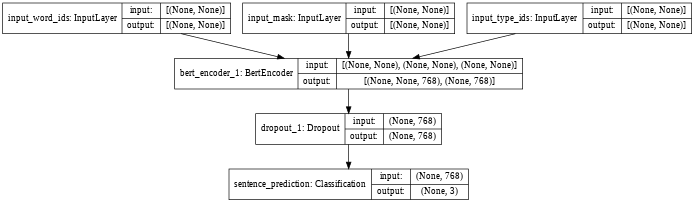

In [ ]:
#Visualising Structure of model
tf.keras.utils.plot_model(bert_classifier, show_shapes=True, dpi=48)


In [ ]:
# Testing on 10 records of data to see what outputs we get
batch_ = {key: val[:10] for key, val in sentence_train.items()}

bert_classifier(
    batch_, training=True
).numpy()

array([[ 0.12066162, -0.07382092,  0.28564823],
       [ 0.13275565, -0.1762188 ,  0.39308578],
       [ 0.1900501 ,  0.00667416,  0.36907303],
       [ 0.39917332,  0.00640763,  0.4400955 ],
       [ 0.05505738, -0.18239367,  0.26655996],
       [ 0.157902  , -0.22123177,  0.2297373 ],
       [ 0.26405704,  0.04070189,  0.25208205],
       [ 0.06579815, -0.2710091 ,  0.3329959 ],
       [ 0.3908273 , -0.18489923,  0.26888746],
       [ 0.3516616 ,  0.0174389 ,  0.19683158]], dtype=float32)

When built the encoder is randomly initialized. Restore the encoder's weights from the checkpoint

In [ ]:
checkpoint = tf.train.Checkpoint(encoder=bert_encoder)
checkpoint.read(
    os.path.join(gs_folder_bert, 'bert_model.ckpt')).assert_consumed()

Bert adopts Adam optimizer with weight decay (aka "AdamW")

In [ ]:
# Set up epochs and steps
epochs = 10
batch_size = 32
eval_batch_size = 32

train_data_size = len(sentence_train_labels)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

# creates an optimizer with learning rate schedule
optimizer = nlp.optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)

INFO:absl:using Adamw optimizer
INFO:absl:gradient_clip_norm=1.000000


In [ ]:
type(optimizer)

official.nlp.optimization.AdamWeightDecay

**Training the model** 
 

* Callback: Early Stopper
* Metric: Categorical Accuracy
* Loss: Categorical Crossentropy

In [ ]:
metrics = [tf.keras.metrics.CategoricalAccuracy('accuracy', dtype=tf.float32)]
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

bert_classifier.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics)

bert_classifier.fit(
      sentence_train, sentence_train_labels,
      validation_data=(sentence_validation, sentence_validation_labels),
      batch_size=32,
      epochs=epochs,
      callbacks= [callback])

Epoch 1/10
234/234 [==============================] - 104s 374ms/step - loss: 1.0686 - accuracy: 0.4100 - val_loss: 0.6800 - val_accuracy: 0.7320
Epoch 2/10
234/234 [==============================] - 86s 367ms/step - loss: 0.5806 - accuracy: 0.7752 - val_loss: 0.5383 - val_accuracy: 0.7995
Epoch 3/10
234/234 [==============================] - 86s 367ms/step - loss: 0.3495 - accuracy: 0.8813 - val_loss: 0.5418 - val_accuracy: 0.8061
Epoch 4/10
234/234 [==============================] - 86s 367ms/step - loss: 0.2093 - accuracy: 0.9346 - val_loss: 0.6434 - val_accuracy: 0.7968


Testing the output by using dummy sentences to see the output 

In [ ]:
my_examples = bert_encode(
    dict_ = {
        'sentence1':[
            'He ran towards to door.',
            'Look I fine tuned BERT.'],
        'sentence2':[
            'He is a lethargic person',
            'Is it working? This does not match.']
    },
    tokenizer=tokenizer)

In [ ]:
result = bert_classifier(my_examples, training=False)


result =np.argmax(softmax(result),axis=1)

convert_arr2onehot(result)


array([[0., 0., 1.],
       [1., 0., 0.]])

**Saving The Model**

export_dir='..New_model/saved_model'
tf.saved_model.save(bert_classifier, export_dir=export_dir)

Testing the Model on Test Data which was allready Encoded

In [ ]:
result = bert_classifier(sentence_test, training=False)       ##Sentence_Test is Encoded Test Data

In [ ]:
result =np.argmax(softmax(result),axis=1)       ##applying softmax and taking argmax
result = convert_arr2onehot(result)             ##converting to one hot encode

In [ ]:
# result = inv_tamp(tamp,result)   ## Invert conversion of one hot encoding


In [ ]:
# [k for i,k in tamp.items() if i == ]
x = [i[0] for i in inv_tamp(tamp,result)]                   
y = [i[0] for i in inv_tamp(tamp,sentence_test_labels)]

In [ ]:
data = pd.DataFrame({'predicted': x, 'original':y})
data

,predicted,original
0,contradiction,contradiction
1,contradiction,contradiction
2,contradiction,contradiction
3,neutral,neutral
4,contradiction,contradiction
...,...,...
369,contradiction,contradiction
370,contradiction,neutral
371,entailment,contradiction
372,entailment,entailment


In [ ]:
from sklearn.metrics import f1_score                          ## Observing the F1 Score for the test data 
f1_score(sentence_test_labels, result, average='micro')

0.7727272727272727

### **From Here Can Be Used For New Data Prediction**

**Reloading the Saved Model**

In [ ]:
export_dir='..New_model/saved_model'
reloaded = tf.saved_model.load(export_dir)              

In [ ]:
# out = reloaded([sentence_test['input_word_ids'],            ## Testing Reloaded model on the same test data
#           sentence_test['input_mask'],                      ## to get an idea whether it is performing 
#           sentence_test['input_type_ids']], training=False) ## same as the saved model or not
# out =np.argmax(softmax(out),axis=1)
# out = convert_arr2onehot(out)
# f1_score(sentence_test_labels, out, average='micro')


Finding the Labels for the test data

In [ ]:
uploaded = files.upload()           ##Used to upload test file or the new file for making our pridiction(colab)

Saving test.csv to test.csv


In [ ]:
## write the name of file 'File_Name.csv' insted of test.csv 
test = pd.read_csv(io.BytesIO(uploaded['test.csv'])) 
test1 = test.copy()

In [ ]:
len(test1)

493

In [ ]:
# Set up tokenizer to generate Tensorflow dataset
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/v3/uncased_L-12_H-768_A-12"
tokenizer = bert.tokenization.FullTokenizer(
    vocab_file=os.path.join(gs_folder_bert, "vocab.txt"),
     do_lower_case=True)

Initializing Sentence Encoder for predction pipeline

In [ ]:
def encode_sentence(s, tokenizer):
   tokens = list(tokenizer.tokenize(s))
   tokens.append('[SEP]')
   return tokenizer.convert_tokens_to_ids(tokens)

def bert_encode(dict_, tokenizer):
  num_examples = len(dict_["sentence1"])

  sentence1 = tf.ragged.constant([
      encode_sentence(s, tokenizer)
      for s in np.array(dict_["sentence1"])])
  sentence2 = tf.ragged.constant([
      encode_sentence(s, tokenizer)
       for s in np.array(dict_["sentence2"])])

  cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*sentence1.shape[0]
  input_word_ids = tf.concat([cls, sentence1, sentence2], axis=-1)

  input_mask = tf.ones_like(input_word_ids).to_tensor()

  type_cls = tf.zeros_like(cls)
  type_s1 = tf.zeros_like(sentence1)
  type_s2 = tf.ones_like(sentence2)
  input_type_ids = tf.concat(
      [type_cls, type_s1, type_s2], axis=-1).to_tensor()

  inputs = {
      'input_word_ids': input_word_ids.to_tensor(),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

  return inputs

In [ ]:
my_examples = bert_encode(test1 , tokenizer=tokenizer)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
new_test_results = reloaded([my_examples['input_word_ids'],
          my_examples['input_mask'],
          my_examples['input_type_ids']], training=False)

In [ ]:
new_test_results

<tf.Tensor: shape=(493, 3), dtype=float32, numpy=
array([[ 1.064542  , -2.0669093 ,  0.7505089 ],
       [-1.9733548 , -0.71929336,  2.2666564 ],
       [ 3.1818075 , -2.2595198 , -0.7246104 ],
       ...,
       [ 3.7840474 , -2.6157863 , -1.2057356 ],
       [ 3.8580852 , -2.4698822 , -1.1492138 ],
       [-1.9989055 ,  3.233899  , -1.1717881 ]], dtype=float32)>

In [ ]:
new_test_results =np.argmax(softmax(new_test_results),axis=1)
new_test_results = convert_arr2onehot(new_test_results)
print(len(new_test_results))
new_test_results


493


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
##Inverse transform to convert one hot encoding to labels
new_test_labels = inv_tamp(tamp,new_test_results)      

In [ ]:
new_test_labels[:10]

[['contradiction'],
 ['neutral'],
 ['contradiction'],
 ['contradiction'],
 ['neutral'],
 ['neutral'],
 ['contradiction'],
 ['entailment'],
 ['contradiction'],
 ['entailment']]

In [ ]:
predicted = pd.DataFrame({'gold_label': [i[0] for i in new_test_labels]})

In [ ]:
predicted.head()

,gold_label
0,contradiction
1,neutral
2,contradiction
3,contradiction
4,neutral


In [ ]:
##Saving Predicted.csv
##Destination path for saving predicted.csv as string
predicted.to_csv('..sentence/predicted.csv')   